Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [1]:
%matplotlib inline

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [2]:
import brfss
import numpy as np
import thinkstats2
import thinkplot

In [3]:
#Read the data 
df = brfss.ReadBrfss(nrows=None)
df.columns

Index([u'age', u'sex', u'wtyrago', u'finalwt', u'wtkg2', u'htm3'], dtype='object')

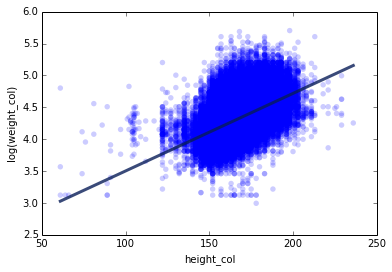

In [4]:
#Null the columns we want to use
df = df.dropna(subset=['htm3', 'wtkg2'])

weight_col = df.wtkg2
height_col = df.htm3
weight_col = np.log(weight_col)

#Compute the slope and intercept
intercept, slope = thinkstats2.LeastSquares(height_col, weight_col)

#Plot the scatter data 
thinkplot.Scatter(height_col, weight_col)
x,y = thinkstats2.FitLine(height_col, intercept, slope)
thinkplot.Plot(x,y)
thinkplot.Config(xlabel='height_col', ylabel='log(weight_col)', legend=False)

0.0405071292926


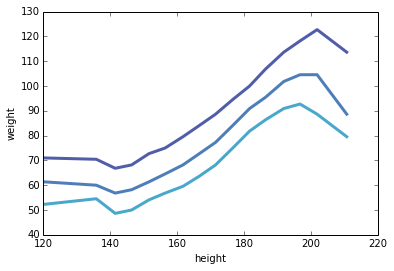

In [6]:
"""Calculating Residuals and checking
if a linear relationship exits"""
res = thinkstats2.Residuals(height_col, weight_col, intercept, slope)
MSE = sum(res**2)/len(res)
print MSE

bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(heights, weights, label=label)

thinkplot.Config(xlabel='height', ylabel='weight', legend=False)

The correlation between log of weight and height between 140 cm and 160 cm is pretty linear. So I would say, within that range, knowing the height can help with guessing the weight. For other parts of the graph, I would say other factors like diet, exercise, etc will come into consideration.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

I didn't quite understand the resampling part in part 10.4 Estimation

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.